In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../../../../Programming'))
	print(os.getcwd())
except:
	pass


/Users/hyeukjung/Programming


In [2]:
#
# Jung_Hyeuk_Project2.py
# MGMTMFE405-2 Computational Methods in Finance - Project 2
# Hyeuk Jung (005250560)
#

import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from math import *

np.random.seed(int(time.time()))

def chol2by2(var1 = 1, var2 = 1, cov = 0, rho = 0):
    sigma1 = sqrt(var1)
    sigma2 = sqrt(var2)
    #cov = sigma1*sigma2*rho
    if(cov != 0):
        rho = cov / sigma1 / sigma2
        L = [[sigma1, 0], [sigma2*rho, sigma2*sqrt(1 - rho*rho)]]
        return L
    else: # rho != 0
        L = [[sigma1, 0], [sigma2*rho, sigma2*sqrt(1 - rho*rho)]]
        return L


In [3]:
##### 1. Multivariate-Normal (Xi, Yi)
mu = np.array([0, 0])
varcov = np.array([[1, -0.7], [-0.7, 1]])
L = np.array(chol2by2(cov=-0.7))
n = 1000
z1 = np.random.normal(0, 1, n)
z2 = np.random.normal(0, 1, n)

X = [ mu[0] + L[0][0]*x for x in z1 ]
Y = [ mu[0] + L[1][0]*x + L[1][1]*y for x, y in zip(z1, z2) ]

x_bar = np.mean(X)
y_bar = np.mean(Y)
cov_xy = sum([ (x - x_bar)*(y - y_bar) for x, y in zip(X, Y) ]) / (n-1)
s_x = sqrt(sum([ (x - x_bar)*(x - x_bar) for x in X ]) / (n-1))
s_y = sqrt(sum([ (y - y_bar)*(y - y_bar) for y in Y ]) / (n-1))
s_rho = cov_xy / s_x / s_y
print('Q1: rho =', s_rho)


Q1: rho = -0.6814831276488547


In [4]:
##### 2. E[ max(0, (X^3+ sin(Y) + X^2Y)) ], X,Y ~ N(0, 1), rho = .6
rho = 0.6
L = np.array(chol2by2(rho=rho))
z3 = np.random.normal(0, 1, n)
z4 = np.random.normal(0, 1, n)
X2 = [ mu[0] + L[0][0]*x for x in z3 ]
Y2 = [ mu[0] + L[1][0]*x + L[1][1]*y for x, y in zip(z3, z4) ]
q2 = [ max(0, x**3 + sin(y) + (x**2)*y) for x, y in zip(X2, Y2) ]
output = np.mean(q2)
print('Q2: E =', output)


Q2: E = 1.4752786618949068


In [5]:
##### 3. (a) E(W5^2 + sin(W5)) and E(e^(t/2) * cos(Wt)), t = 0.5, 3.2, 6.5
# #Ws ~ N(0, s) --> sqrt(s)Z ~ Ws
z5 = np.random.normal(0, 1, n)
t = sqrt(5)
W_50 = [ t*x for x in z5 ]
q3_50 = [ x*x + sin(x) for x in W_50 ]
q3_50_mean = np.mean(q3_50); q3_50_var = np.var(q3_50)

t1 = 0.5; t1root = sqrt(t1); exp_t1 = exp(t1 / 2)
z6 = np.random.normal(0, 1, n)
W_05 = [t1root * x for x in z6] 
q3_05 = [exp_t1 * cos(x) for x in W_05]
q3_05_mean = np.mean(q3_05); q3_05_var = np.var(q3_05)

t2 = 3.2; t2root = sqrt(t2); exp_t2 = exp(t2 / 2)
z7 = np.random.normal(0, 1, n)
W_32 = [t2root * y for y in z7]
q3_32 = [exp_t2 * cos(y) for y in W_32]
q3_32_mean = np.mean(q3_32); q3_32_var = np.var(q3_32)

t3 = 6.5; t3root = sqrt(t3); exp_t3 = exp(t3 / 2)
z8 = np.random.normal(0, 1, n)
W_65 = [t3root * z for z in z8]
q3_65 = [exp_t3 * cos(z) for z in W_65]
q3_65_mean = np.mean(q3_65); q3_65_var = np.var(q3_65)


##### 3. (b) Integrals of the last three and relation
width = 1/n
integral_50 = sum([i * width for i in q3_50])
integral_05 = sum([x * width for x in q3_05])
integral_32 = sum([y * width for y in q3_32])
integral_65 = sum([z * width for z in q3_65])

matrix1 = np.reshape((q3_50_mean, q3_05_mean, q3_32_mean, q3_65_mean, integral_50, integral_05, integral_32, integral_65), (2, 4))
df1 = pd.DataFrame(matrix1, columns = ['1', '2', '3', '4'], index=['Ea', 'Eb'])
print('\n3. (a), (b) :\n', df1)

##### 3. (c) Variance Reduction
# Control Variates
Y = [sin(x) for x in W_50] # theoretical mean = 0
gamma_50 = np.cov(q3_50, Y)[0][1] / np.var(Y)
T_50 = [x - gamma_50*y for x, y in zip(q3_50, Y)]
T_50_mean = np.mean(T_50); T_50_var = np.var(T_50)

control = np.random.uniform(0, pi/2, 1000) 
Y2 = [ cos(x) for x in control] # theoretical mean = 2/pi
y2_mean = 2/pi; y2_var = np.var(Y2)

gamma_05 = np.cov(q3_05, Y2)[0][1] / y2_var
T_05 = [x - gamma_05*(y - y2_mean) for x, y in zip(q3_05, Y2)]
T_05_mean = np.mean(T_05); T_05_var = np.var(T_05)

gamma_32 = np.cov(q3_32, Y2)[0][1] / y2_var
T_32 = [x - gamma_32*(y - y2_mean) for x, y in zip(q3_32, Y2)]
T_32_mean = np.mean(T_32); T_32_var = np.var(T_32)

gamma_65 = np.cov(q3_65, Y2)[0][1] / y2_var
T_65 = [x - gamma_65*(y - y2_mean) for x, y in zip(q3_65, Y2)]
T_65_mean = np.mean(T_65); T_65_var = np.var(T_65)

matrix2 = np.reshape((q3_50_mean, q3_50_var, T_50_mean, T_50_var, 
                        q3_05_mean, q3_05_var, T_05_mean, T_05_var, 
                        q3_32_mean, q3_32_var, T_32_mean, T_32_var, 
                        q3_65_mean, q3_65_var, T_65_mean, T_65_var), (4, 4))
df2 = pd.DataFrame(matrix2, columns = ['Mean 5.(a)', 'Variance5.(a)', 'Control: Mean', 'Control: Var'], index=['t = 5.0', 't = 0.5', 't = 3.2', 't = 6.5'])
print('\n3. (c):\n', df2)
print('\nI used control variate method. Using this method, the variance of four processes do decrease for little amount.\nFrom this, we can conclude that applying this variance reduction method improved the convergence speed.')




3. (a), (b) :
            1         2         3         4
Ea  4.962552  0.999467  1.060791  0.315239
Eb  4.962552  0.999467  1.060791  0.315239

3. (c):
          Mean 5.(a)  Variance5.(a)  Control: Mean  Control: Var
t = 5.0    4.962552      49.919292       4.991484     49.489414
t = 0.5    0.999467       0.126569       0.999890      0.126509
t = 3.2    1.060791      11.193320       1.060150     11.193182
t = 6.5    0.315239     336.414259       0.263558    335.516556

I used control variate method. Using this method, the variance of four processes do decrease for little amount.
From this, we can conclude that applying this variance reduction method improved the convergence speed.


In [6]:
##### 4. (a) European call option using Monte Carlo Simulation
r = 0.04; sigma = 0.2; S0 = 88; T = 5; t = sqrt(T); X = 100

S_Ts = list()
for i in range(0, 1000, 1):
    z = np.random.normal(0, 1, 1000)
    Wt = [ t*x for x in z ]
    S_T = S0 * exp(sigma*Wt[len(Wt)-1] + (r-sigma*sigma/2)*T)
    S_Ts.append(S_T)

discount = exp(-1*r*T)
C_0s = [ discount*(max(0, (S_T - X))) for S_T in S_Ts ]


In [7]:
##### 4. (b) European call option & variance reduction method
# Antithetic Variates
S_plus = list()
S_minus = list()
for i in range(1, 1001, 1):
    z = np.random.normal(0, 1, 1000)
    Wt_z = [ t*x for x in z ]
    S_z = S0 * exp(sigma*Wt_z[len(Wt_z)-1] + (r-sigma*sigma/2)*T)
    S_plus.append(S_z)
    Wt_anti_z = [ t*(-1)*x for x in z ]
    S_anti_z = S0 * exp(sigma*Wt_anti_z[len(Wt_anti_z)-1] + (r-sigma*sigma/2)*T)
    S_minus.append(S_anti_z)

C_plus = [ discount*(max(0, (splus - X))) for splus in S_plus ]
C_minus = [ discount*(max(0, (sminus - X))) for sminus in S_minus ]
c = [(x + y)/2 for x, y in zip(C_plus, C_minus)]

matrix3 = np.reshape((np.mean(C_0s), np.var(C_0s), np.mean(c), np.var(c)), (2, 2))
df3 = pd.DataFrame(matrix3, columns = ['Mean', 'Variance'], index=['Monte Carlo 4.(a)', 'Antithetic 4.(b)'])
print('\n4. (a), (b):\n', df3)
print('\n4. (b):\nThe exact value of the call option calculated by the Black-Scholes formula is 18.23.\nIn part 4.(b), I used the antithetic variates method and was able to reduce the variance to about 1/3 compared to the one I got from the Monte Carlo simulation.\nThis method also improved the accuracy for the mean.')



4. (a), (b):
                         Mean    Variance
Monte Carlo 4.(a)  18.503731  989.019734
Antithetic 4.(b)   18.972842  368.615558

4. (b):
The exact value of the call option calculated by the Black-Scholes formula is 18.23.
In part 4.(b), I used the antithetic variates method and was able to reduce the variance to about 1/3 compared to the one I got from the Monte Carlo simulation.
This method also improved the accuracy for the mean.


In [8]:
##### 5. (a) n = 1:10, use 1000 simulations of Sn
r = 0.04; sigma = 0.18; S0 = 88
S = []
S.append(S0)
st = []
for i in range(1, 11, 1):
    for j in range(0, 1000, 1):
        z = np.random.normal(0, 1, 1000)
        w = [ sqrt(i)*x for x in z ]
        st.append(np.mean( [ S0 * exp( sigma*x + (r-sigma*sigma/2)*i ) for x in w] ))
    S.append(np.mean(st))
    st.clear()


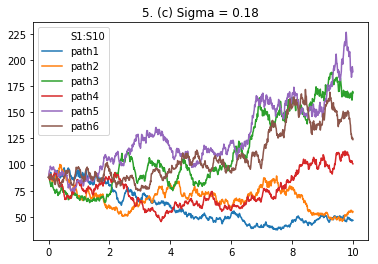

<Figure size 432x288 with 0 Axes>

In [9]:
##### 5. (b) 
w0 = 0; dt = 10/1000
S1 = []
paths = pd.DataFrame()
for i in range(1, 7, 1):
    S1.clear()
    S1.append(S0)
    #W = np.zeros(1000)
    for j in np.arange(dt, 10.01, dt):
        z = np.random.normal(0, 1, 1)
        w = sqrt(dt)*z 
        S1.append( S1[-1] * exp(sigma*w + (r-sigma*sigma/2)*dt) )
    column = 'path' + str(i)
    paths[column] = S1
    
plt.plot(range(0, 11, 1), S, 'o', color='white')
plt.plot(np.arange(0, 10.01, dt), paths)
plt.gca().legend(('S1:S10', 'path1','path2', 'path3', 'path4', 'path5', 'path6'))
plt.title('5. (c) Sigma = 0.18')
plt.show()
plt.savefig('5_c_sigma_0.18.png')


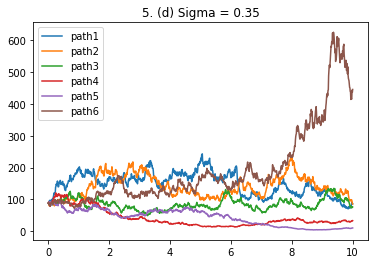


5. (d): By increasing the sigma from .18 to .35, the range of values widened from about 40:200 to 40:600.


<Figure size 432x288 with 0 Axes>

In [10]:
##### 5. (c) sigma = 0.35
sigma = 0.35; dt = 10/1000
S1 = []
paths = pd.DataFrame()
for i in range(1, 7, 1):
    S1.clear()
    S1.append(S0)
    #W = np.zeros(1000)
    for j in np.arange(dt, 10.01, dt):
        z = np.random.normal(0, 1, 1)
        w = sqrt(dt)*z 
        S1.append( S1[-1] * exp(sigma*w + (r-sigma*sigma/2)*dt) )
    column = 'path' + str(i)
    paths[column] = S1

plt.plot(np.arange(0, 10.01, dt), paths)
plt.gca().legend(('path1','path2', 'path3', 'path4', 'path5', 'path6'))
plt.title('5. (d) Sigma = 0.35')
plt.show()
plt.savefig('5_d_sigma_0.35.png')
print('\n5. (d): By increasing the sigma from .18 to .35, the range of values widened from about 40:200 to 40:600.')



In [11]:
##### 6. (a) Euler's discretization
dt = 1/1000
integral = 4 * sum([(sqrt(1 - x*x)) * dt for x in np.arange(dt, 1+dt, dt)])
print('\n6. (a): Ia =', integral)

##### 6. (b) Monte Carlo Simulation
uni = np.random.uniform(0, 1, 1000)
monte = [4 * sqrt(1 - x*x) for x in uni]
print('\n6. (b): Ib =', np.mean(monte))

##### 6. (c) Importance Sampling
def g(x): 
    g = sqrt(1 - x*x)
    return g

def h(x): 
    h = (1 - 0.74*x*x) / (1 - 0.74/3)
    return h

def f(x):
    if (x >=0 and x <= 1):
        return 1
    else:
        return 0

uni = np.random.uniform(0, 1, 1000)
fgh = [f(x)*g(x)/h(x) for x in uni]
for i in range(0, len(fgh), 1):
    sampling = [ 4*fgh[i]*h(x) for x in uni]

matrix4 = np.reshape((np.mean(monte), np.var(monte), np.mean(sampling), np.var(sampling)), (2, 2))
df4 = pd.DataFrame(matrix4, columns = ['Mean', 'Variance'], index=['Monte Carlo 6.(b)', 'Importance Sampling 6.(c)'])
print('\n6. (b), (c):\n', df4)
print('\nThe result from importance sampling does not seem to improve the result we can get from the Monte Carlo simulation. The mean and variance both increased.')


6. (a): Ia = 3.1395554669110277

6. (b): Ib = 3.212312222246473

6. (b), (c):
                                Mean  Variance
Monte Carlo 6.(b)          3.212312  0.654990
Importance Sampling 6.(c)  3.231366  0.916577

The result from importance sampling does not seem to improve the result we can get from the Monte Carlo simulation. The mean and variance both increased.
